## 1. Importing Basic Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/train.csv")
pd.set_option('display.max_columns', 100)
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


## 2. Data Exploration , Cleaning and Handling

In [3]:
df.shape

# Rows : 1,03,904      Columns : 25

(103904, 25)

In [4]:
# Identify unnecesary columns

# 1. Unnamed:0
# 2. id

### Remove unnecessay features

df = df.drop(['Unnamed: 0','id'],axis=1)

In [5]:
len(df.columns)

23

In [6]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [7]:
df.duplicated().sum()

0

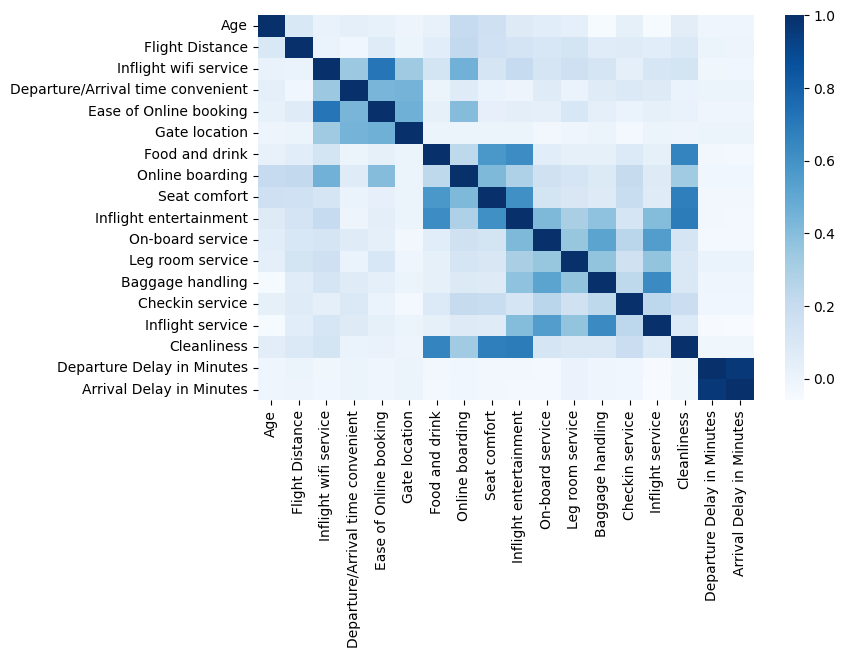

In [8]:
numeric_df = df.select_dtypes(include='number')

corr = numeric_df.corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr , cmap="Blues")
plt.show()

In [9]:
# Departure Delay and Arrival Delay :  highly positively correlated -- If a flight departs late, it is likely to arrive late as well

In [12]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


#### Insights

- Arrival Delay Column:
  * The minimum arrival delay is 0 (indicating no delay).
  * The maximum arrival delay is 1584.
- Flight Distance Column:
  * The shortest flight distance in the dataset is 31(suspicious)
  * The longest flight distance in the dataset is 4983.
- Departure Delay Column:
  * The minimum departure delay is 0.
  * The maximum departure delay is 1592.
- Note:
  * There appears to be outliers in the data as there is a significant difference between the third quartile (Q3) and the maximum value.

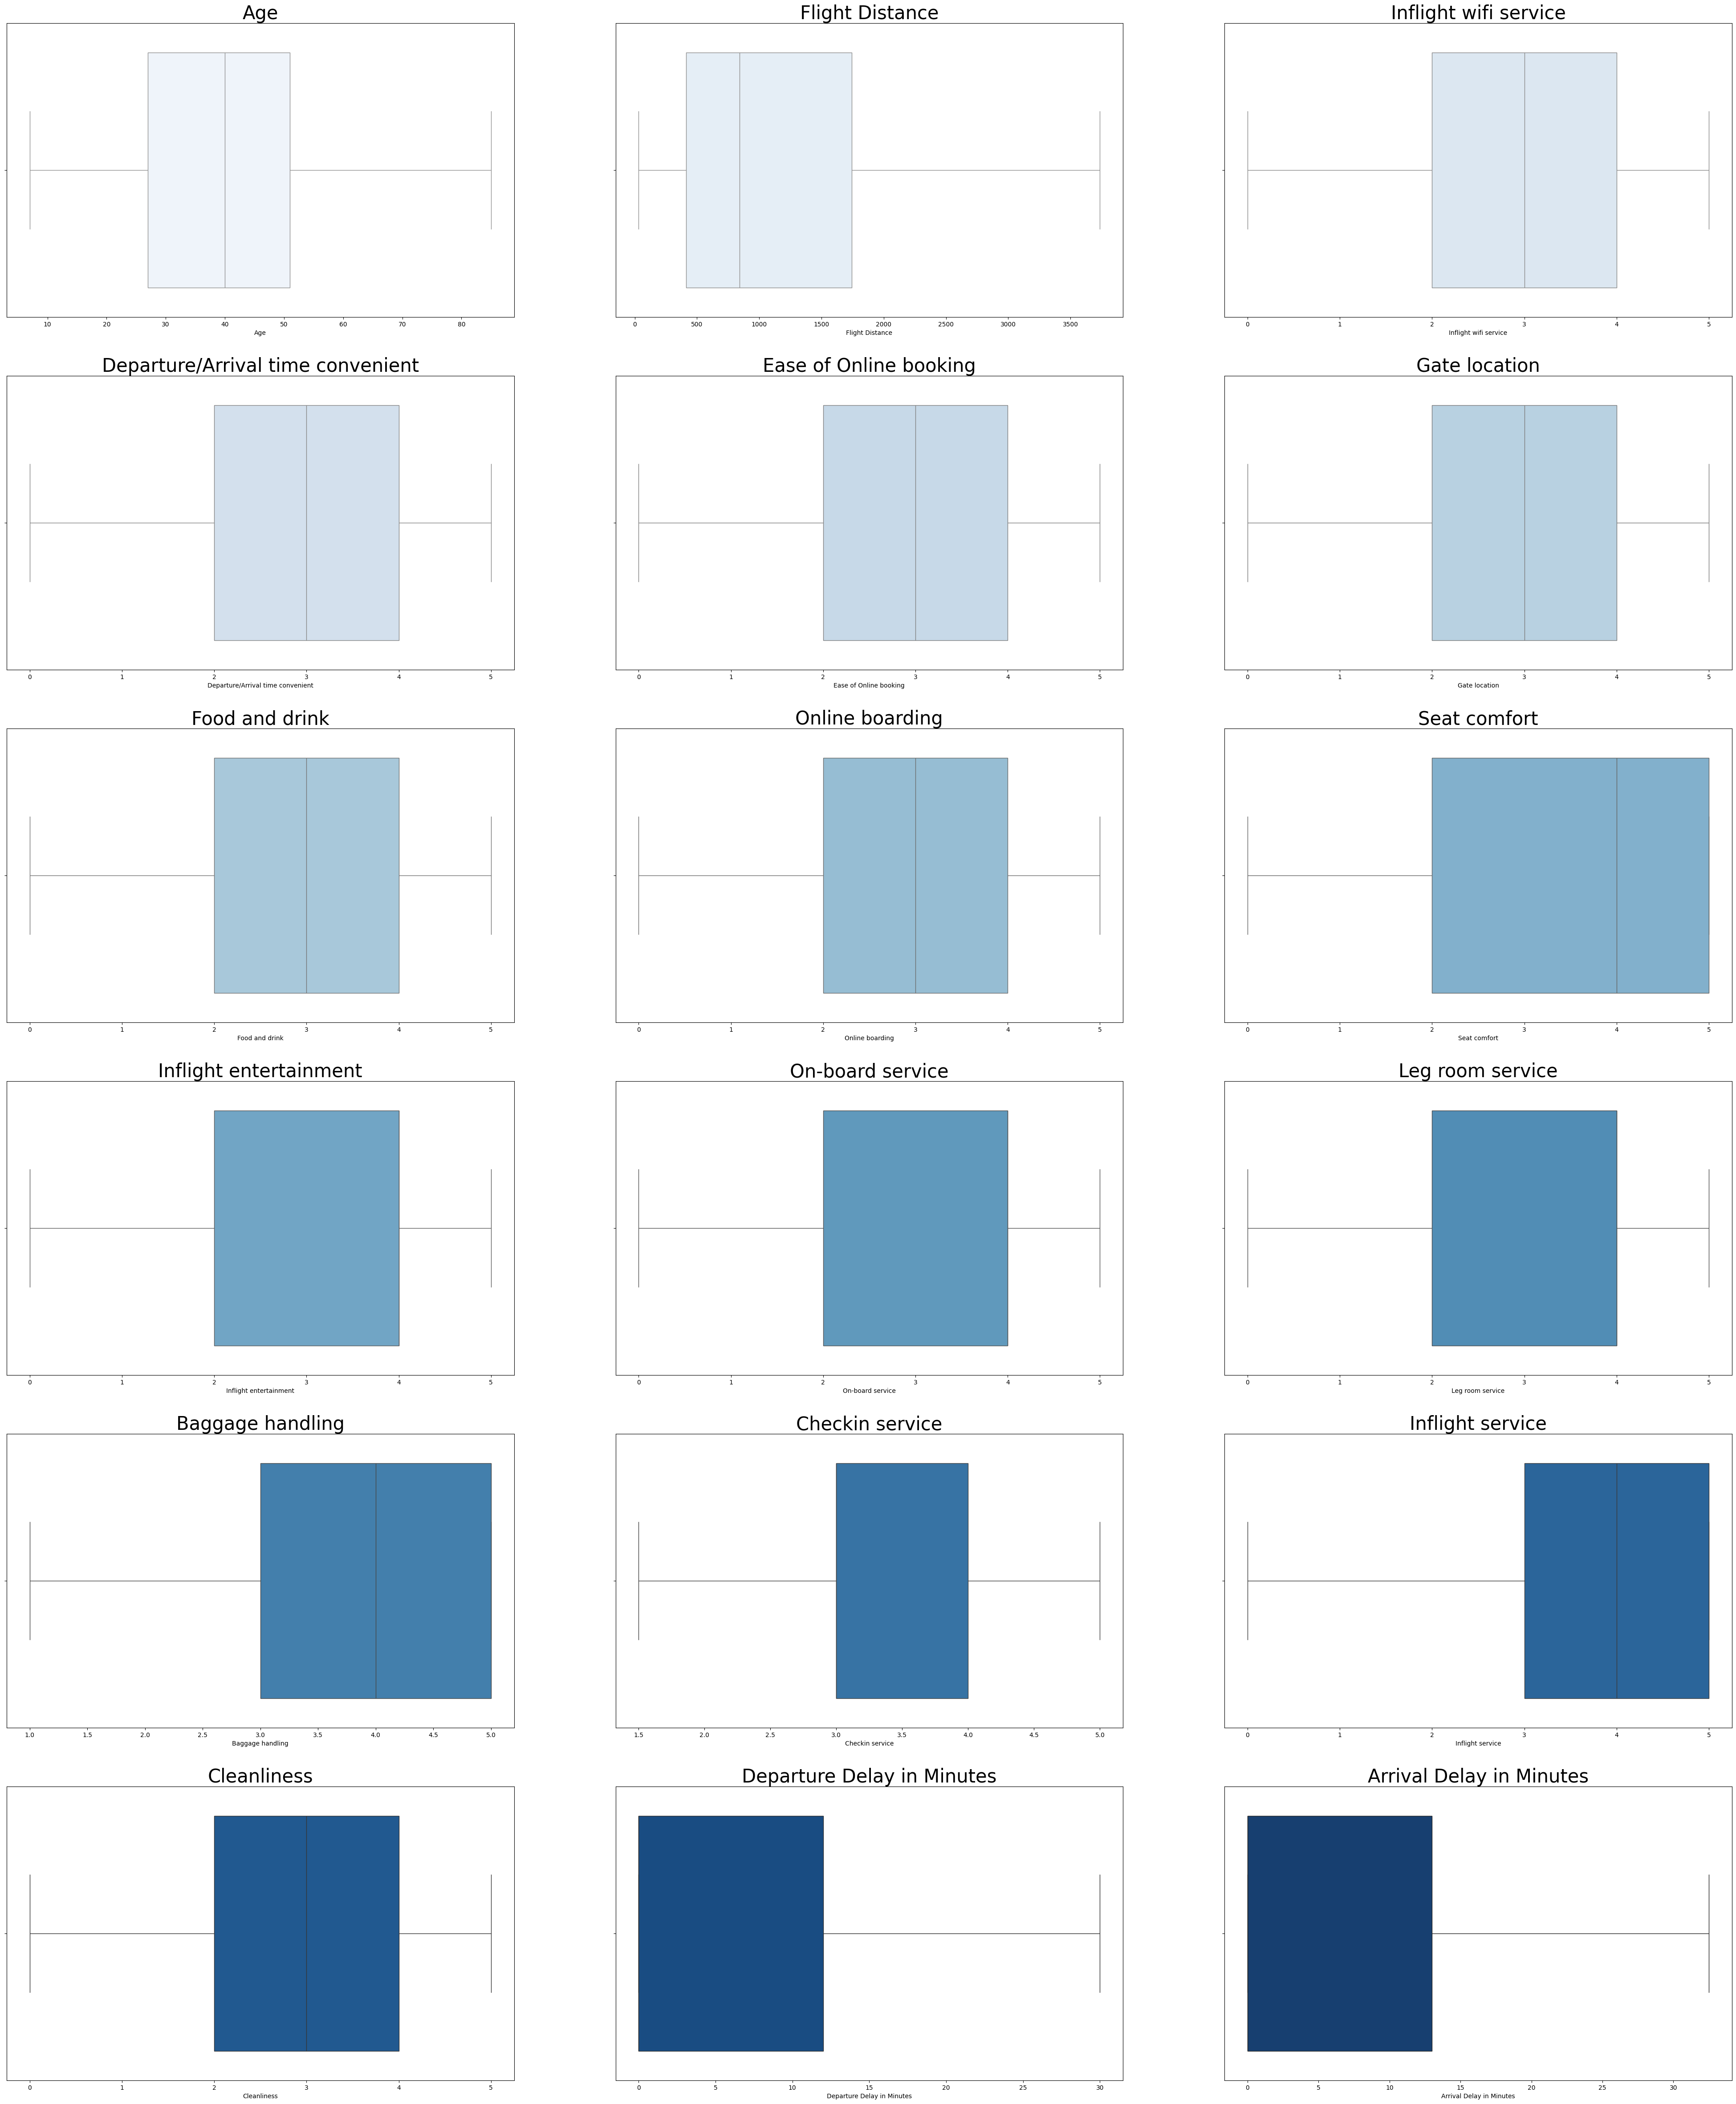

In [10]:
### Check for Outliers

numerical = df.select_dtypes(include=['int', 'float'])

blue_palette = sns.color_palette("Blues", n_colors=len(numerical.columns))

fig, axes = plt.subplots(6, 3, figsize=(50, 60))
axes = axes.flatten()

for i, col in enumerate(numerical.columns):
    sns.boxplot(x=df[col], ax=axes[i], color=blue_palette[i])
    axes[i].set_title(col, fontsize=30)
    
plt.show()

In [12]:
### We know these columns have outliers : 

# 1. Departure Delay ( too much )
# 2. Arrival Delay  (  too much )
# 3. Check-In service ( very less )
# 4. Flight Distance ( Moderate )

In [9]:
### Handle Outliers

def handle_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df

columns_to_handel= ['Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes', 'Checkin service']
df = handle_outliers(df, columns_to_handel)

In [11]:
### Handle Null values of Arrival Delay in Minutes

df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())


In [13]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## 3. EDA

In [14]:
new_df = df.copy()

In [15]:
new_df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [16]:
columns_with_six_categories = new_df.columns[new_df.nunique() == 6]
columns_with_six_categories

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Inflight service',
       'Cleanliness'],
      dtype='object')

In [17]:
new_df["Cleanliness"].value_counts()

Cleanliness
4    27179
3    24574
5    22689
2    16132
1    13318
0       12
Name: count, dtype: int64

In [18]:
ordinal_mapping = {
    0: "Very Poor",
    1: "Poor",
    2: "Average",
    3: "Good",
    4: "Excellent",
    5: "Outstanding"
}

In [19]:
new_df[columns_with_six_categories] = new_df[columns_with_six_categories].applymap(lambda x: ordinal_mapping.get(x, x))

In [21]:
new_df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,Good,Excellent,Good,Poor,Outstanding,Good,Outstanding,Outstanding,Excellent,Good,4,4.0,Outstanding,Outstanding,25,18.0,neutral or dissatisfied


In [22]:
df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3,4,3,1,5,3,5,5,4,3,4,4.0,5,5,25,18.0,neutral or dissatisfied


In [23]:
df["Baggage handling"].value_counts()

# It does not have any 0 value thats why we need another mapping for it

Baggage handling
4    37383
5    27131
3    20632
2    11521
1     7237
Name: count, dtype: int64

In [25]:
mapping = {
    1: "Very Poor",
    2: "Poor",
    3: "Average",
    4: "Good",
    5: "Excellent",
}

new_df['Baggage handling'] = new_df['Baggage handling'].apply(lambda x: ordinal_mapping.get(x, x))

In [26]:
new_df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,Good,Excellent,Good,Poor,Outstanding,Good,Outstanding,Outstanding,Excellent,Good,Excellent,4.0,Outstanding,Outstanding,25,18.0,neutral or dissatisfied


In [27]:
df["Checkin service"].value_counts()

# It also has other type of mapping

Checkin service
4.0    29055
3.0    28446
5.0    20619
2.0    12893
1.5    12891
Name: count, dtype: int64

In [28]:
mapping = {
    1.5: "Very Poor",
    2.0: "Poor",
    3.0: "Average",
    4.0: "Good",
    5.0: "Excellent",
}

new_df['Checkin service'] = new_df['Checkin service'].apply(lambda x: ordinal_mapping.get(x, x))

In [29]:
new_df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,Good,Excellent,Good,Poor,Outstanding,Good,Outstanding,Outstanding,Excellent,Good,Excellent,Excellent,Outstanding,Outstanding,25,18.0,neutral or dissatisfied


### Now alll data is set for EDA

In [30]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

### UNIVARIATE EDA

In [31]:
numerical_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 
                       'Inflight wifi service', 'Departure/Arrival time convenient', 
                       'Ease of Online booking', 'Gate location', 'Food and drink', 
                       'Online boarding', 'Seat comfort', 'Inflight entertainment', 
                       'On-board service', 'Leg room service', 'Baggage handling', 
                       'Checkin service', 'Inflight service', 'Cleanliness']


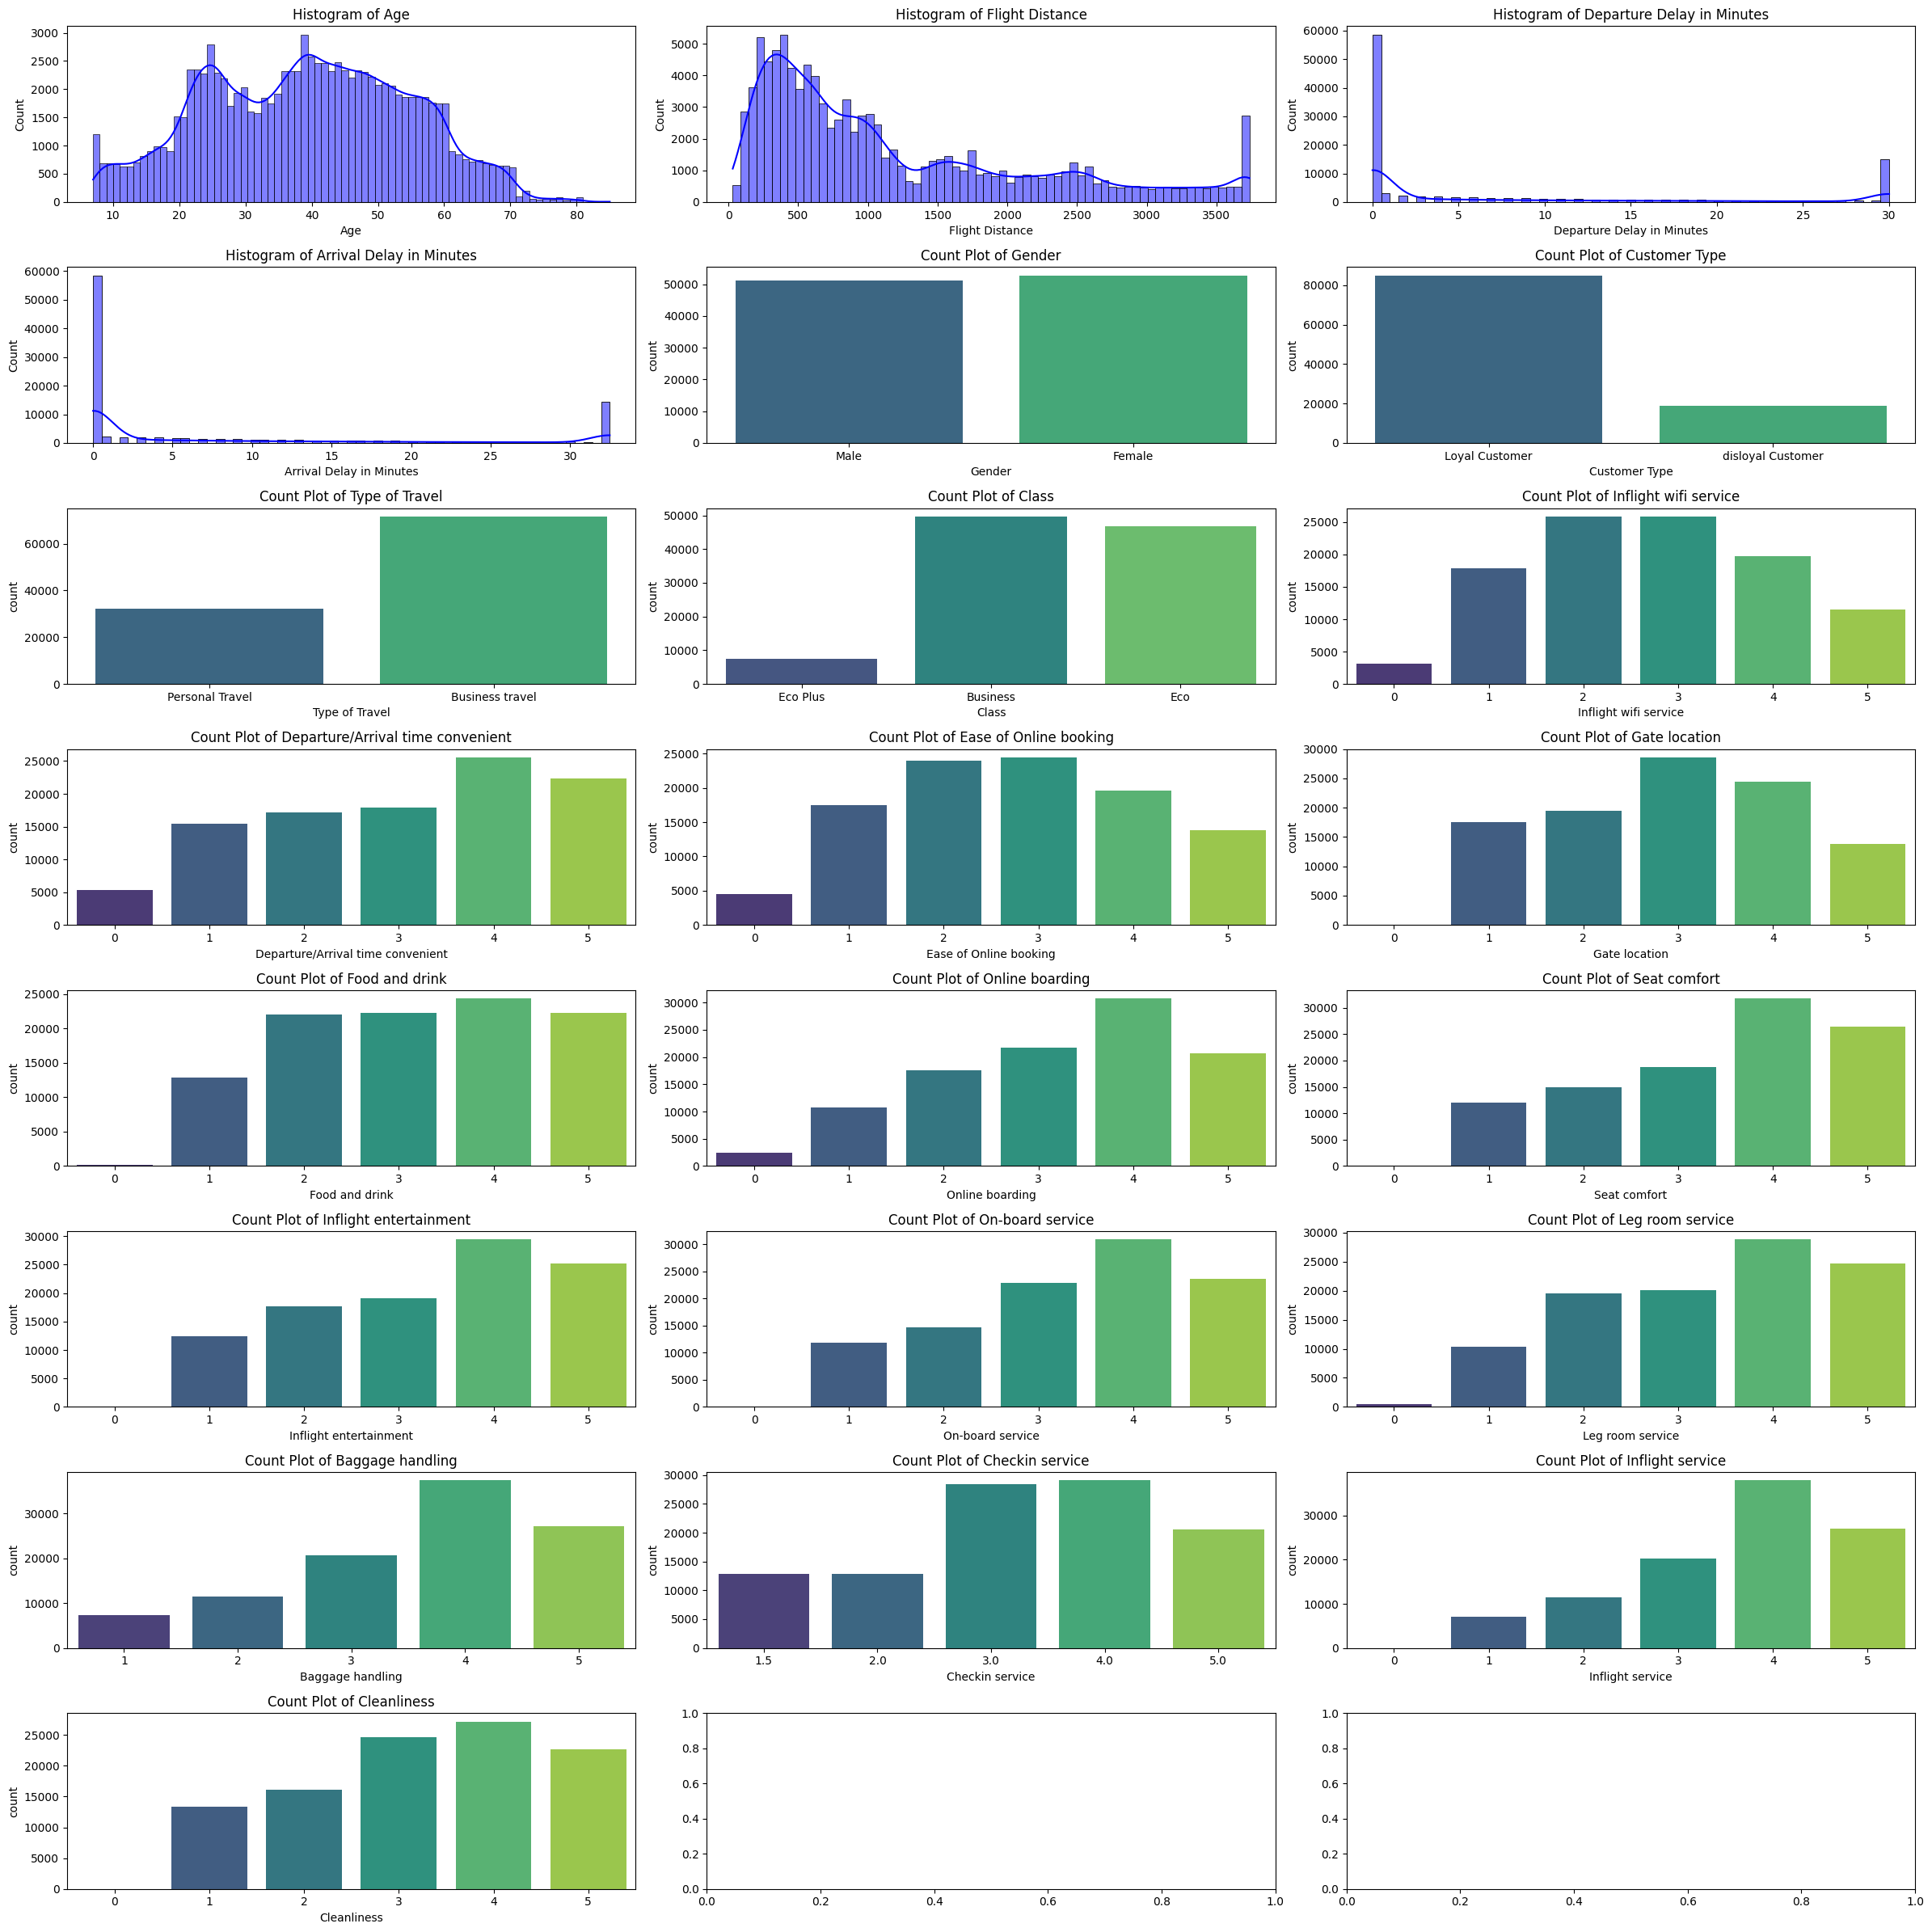

In [32]:
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(24, 24))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f'Histogram of {col}')

# Plot bar plots for categorical features
for j, col in enumerate(categorical_columns):
    if i + 1 + j < len(axes):
        sns.countplot(x=df[col], ax=axes[i + 1 + j], palette='viridis')
        axes[i + 1 + j].set_title(f'Count Plot of {col}')

plt.tight_layout()
plt.show()

## Bivariate EDA 

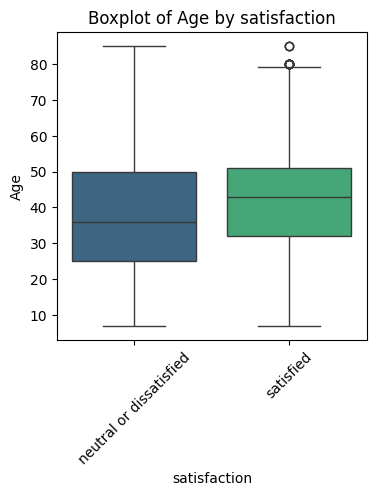

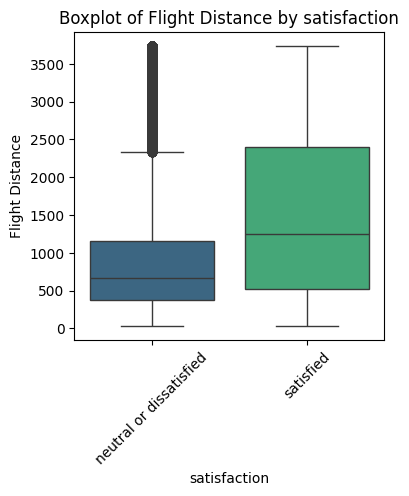

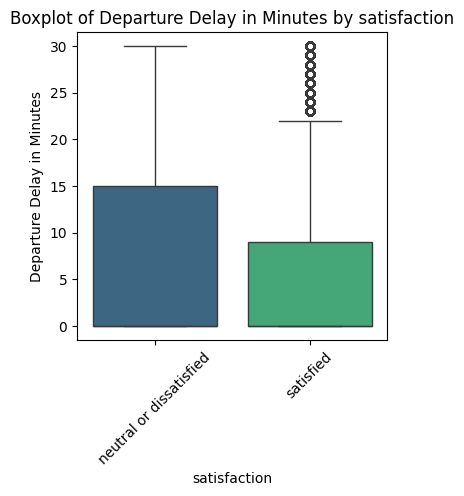

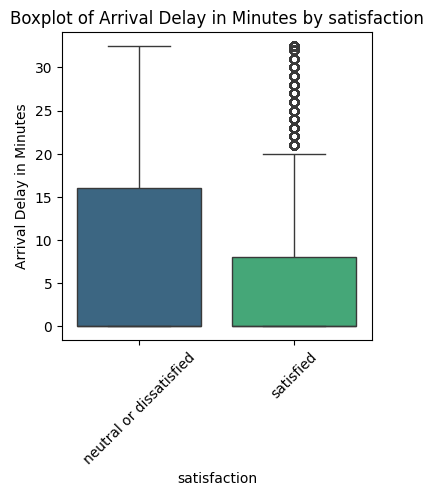

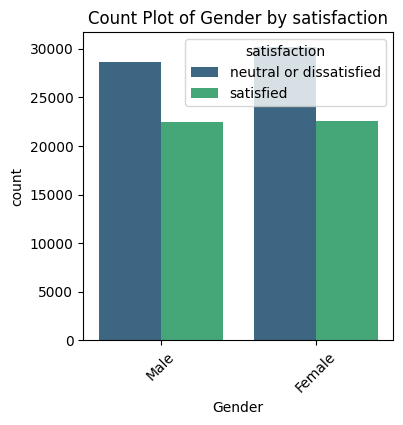

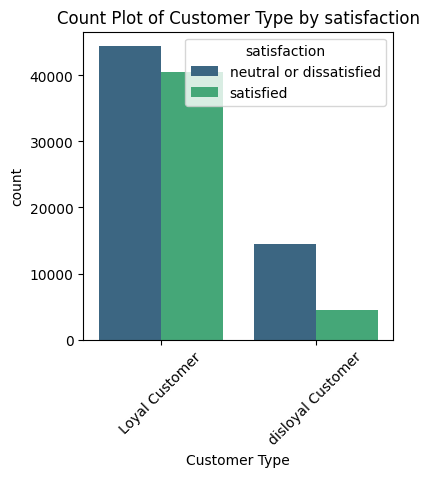

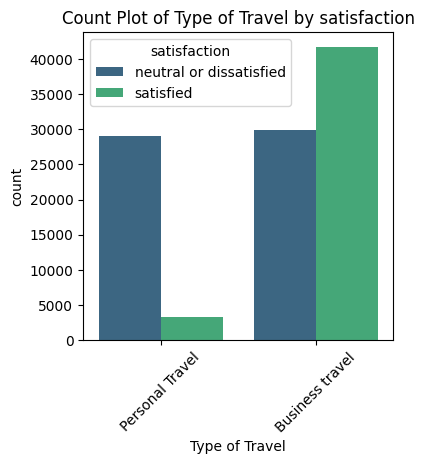

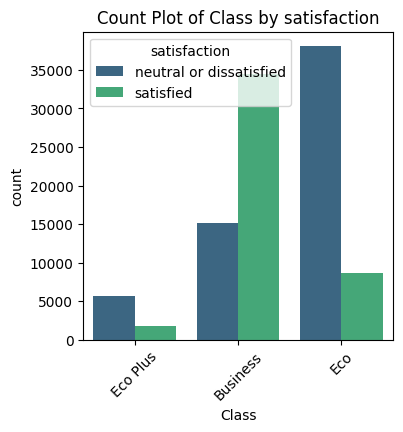

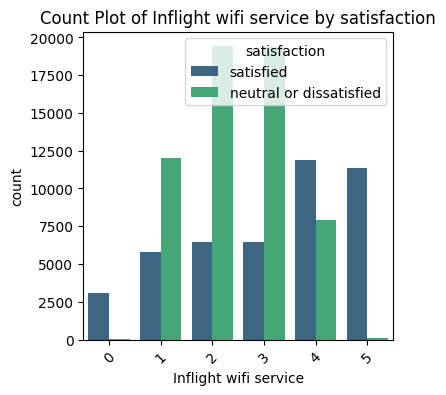

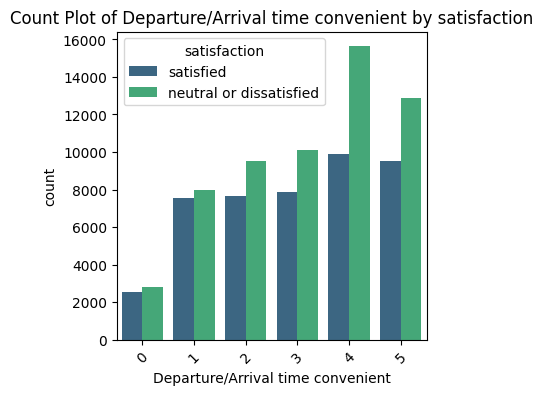

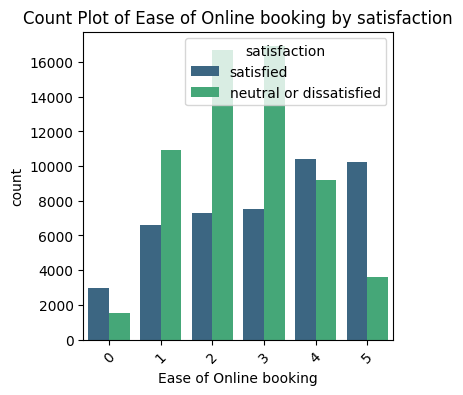

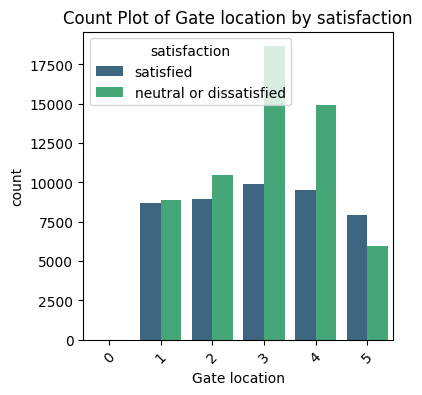

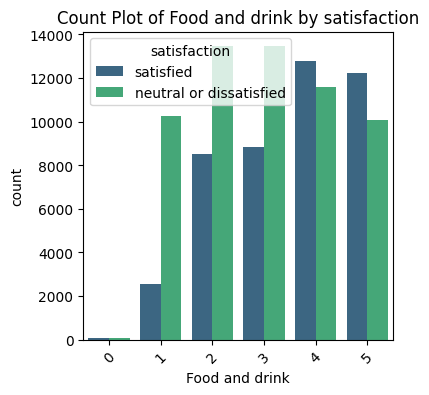

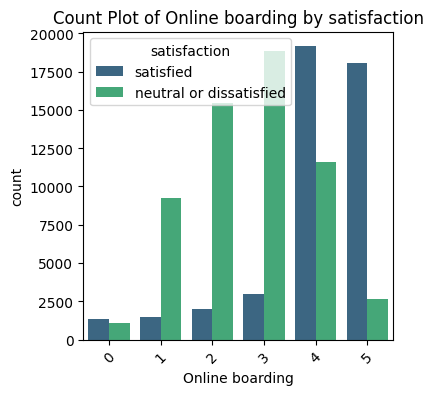

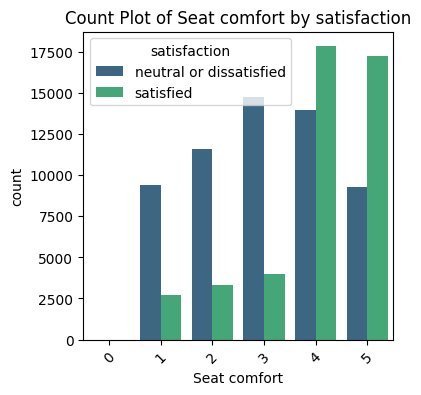

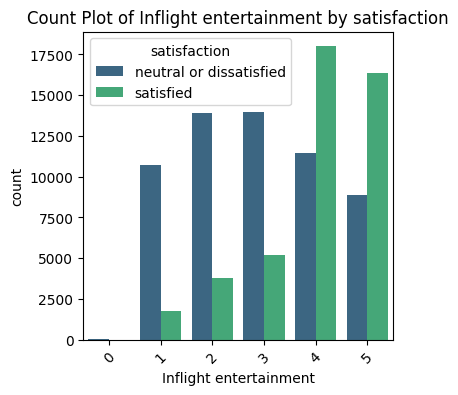

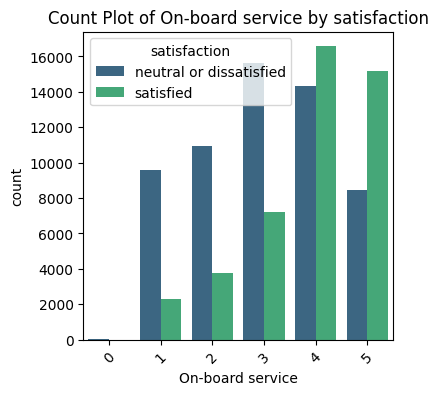

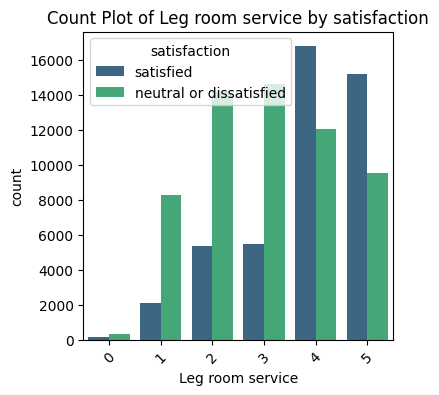

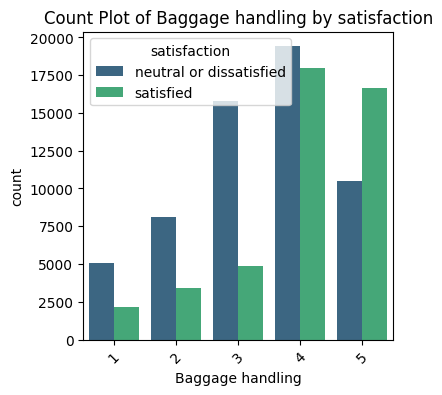

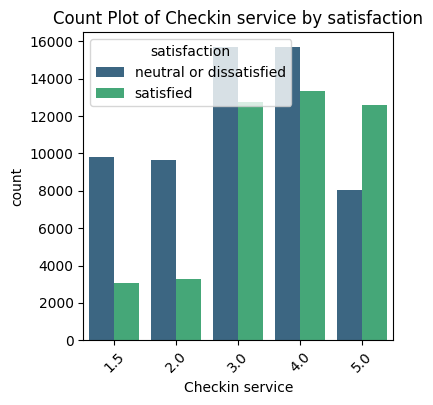

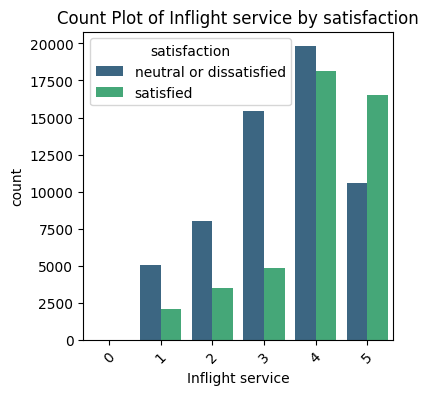

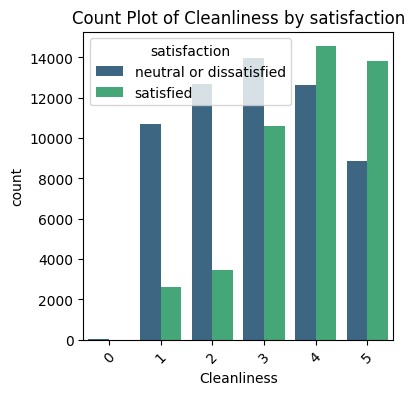

In [34]:
target_column = 'satisfaction'

# Numerical vs. Target
for col in numerical_columns:
    plt.figure(figsize=(4,4))
    sns.boxplot(x=df[target_column], y=df[col], palette='viridis')
    plt.title(f'Boxplot of {col} by {target_column}')
    plt.xticks(rotation=45)
    plt.show()

# Categorical vs. Target
for col in categorical_columns:
    plt.figure(figsize=(4,4))
    sns.countplot(x=df[col], hue=df[target_column], palette='viridis')
    plt.title(f'Count Plot of {col} by {target_column}')
    plt.xticks(rotation=45)
    plt.show()
    
# Categorical vs. Numerical (Bar plots with average values)
# for col in categorical_columns:
#     plt.figure(figsize=(12, 6))
#     sns.barplot(x=df[col], y=df[numerical_columns[0]], hue=df[target_column], palette='viridis', ci=None)
#     plt.title(f'Bar Plot of {numerical_columns[0]} by {col} and {target_column}')
#     plt.xticks(rotation=45)
#     plt.show()

### Multivariate EDA

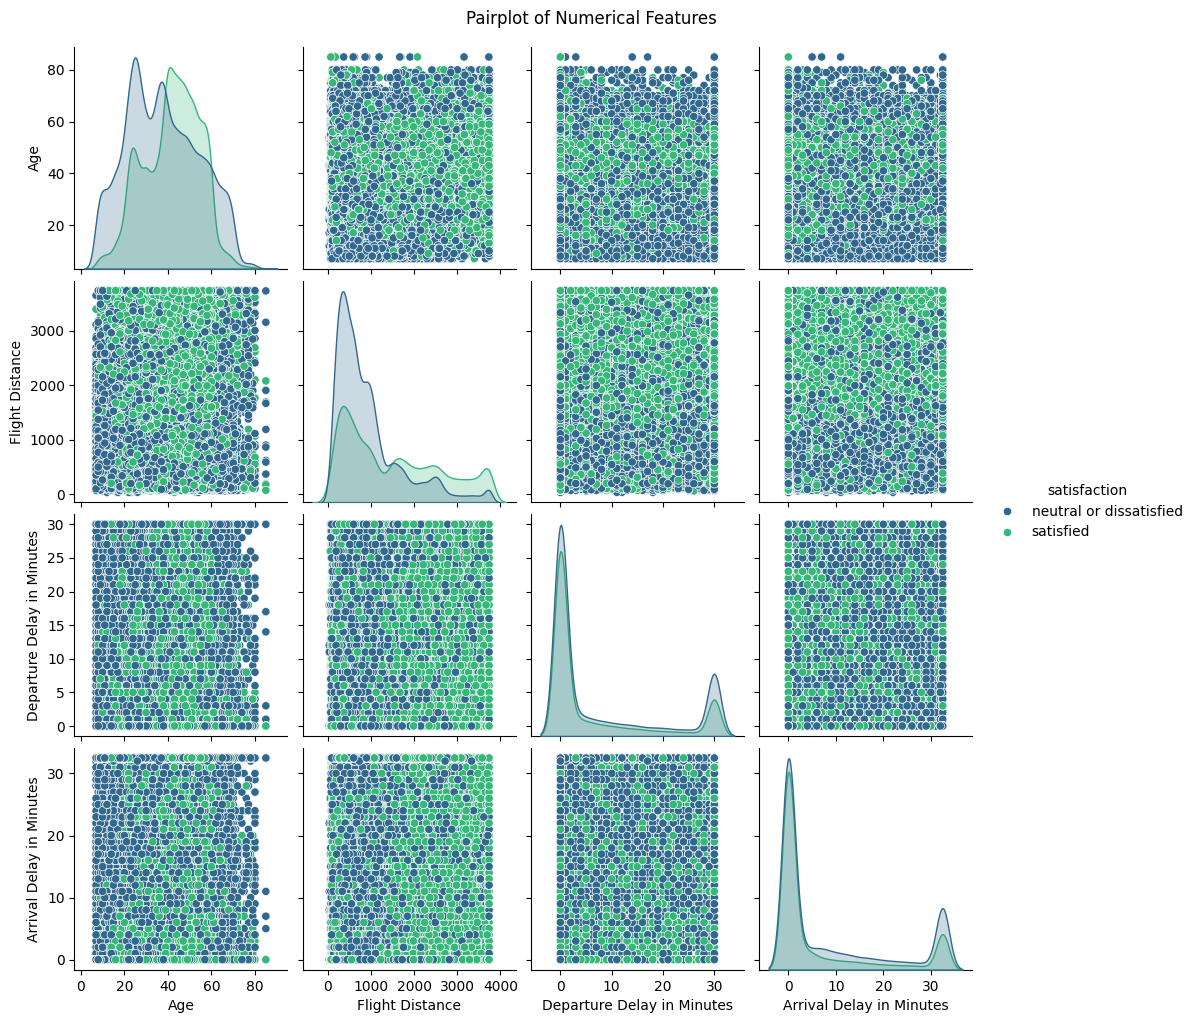

In [35]:
sns.pairplot(df[numerical_columns + [target_column]], hue=target_column, palette='viridis')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

## IMPORTANT INSIGHTS

* Majority of people who travel are from Age-group 20-40 . This age group is of youngsters like students , working professionals , tourists , buisness man, etc.
* Most of people only tavel for upto 1000km distance. As only tourist people travel for long distances.
* Most of flights are not delayed but if they are delayed they are delayed for more than 30 minutes.Gnerally flights are delayed due to extreme weather conditions and if weather is bad it generally remains bad for quite a time.
* Female travels slightly more than Males.
* Most of flight customers are loyal which means they have taken thsi flight previously too.
* Most of people travel for buisness purposes.
* Most people travel in Buisness and Eco Class . Eco Plus price is generally between these two classes and just offfers some basic amenties like leg-room , etc which many people dont find valuable enough.
* Flight wifi service is average . They should make it better.
* They should focus on their online booking technolgy as people are facing problem due to this.
* Seat Comfort and Inflight service is also not that good.

## 4. FEATURE ENGINEERING

In [36]:
### Make a new column using Feature Construction ( Domain Knowledge )

df['Total Delay'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']

In [37]:
df['Delay Ratio'] = df['Total Delay'] / (df['Flight Distance'] + 1)

In [38]:
df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay,Delay Ratio
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3,4,3,1,5,3,5,5,4,3,4,4.0,5,5,25,18.0,neutral or dissatisfied,43.0,0.093275


In [39]:
### Convert Age using Binning
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 100], labels=['Child', 'Youngster', 'Adult', 'Senior'])

In [40]:
df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay,Delay Ratio,Age Group
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3,4,3,1,5,3,5,5,4,3,4,4.0,5,5,25,18.0,neutral or dissatisfied,43.0,0.093275,Child


In [45]:
df.dtypes

Gender                                 int32
Customer Type                          int32
Age                                    int64
Type of Travel                         int32
Class                                  int32
Flight Distance                      float64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                      float64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [42]:
### Label Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

columns_to_encode = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction', 'Age Group']

label_mappings = {}

for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))


for col, mapping in label_mappings.items():
    print(f"Mapping for {col}: {mapping}")

Mapping for Gender: {'Female': 0, 'Male': 1}
Mapping for Customer Type: {'Loyal Customer': 0, 'disloyal Customer': 1}
Mapping for Type of Travel: {'Business travel': 0, 'Personal Travel': 1}
Mapping for Class: {'Business': 0, 'Eco': 1, 'Eco Plus': 2}
Mapping for satisfaction: {'neutral or dissatisfied': 0, 'satisfied': 1}
Mapping for Age Group: {'Adult': 0, 'Child': 1, 'Senior': 2, 'Youngster': 3}


In [43]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Total Delay', 'Delay Ratio', 'Age Group'],
      dtype='object')

In [44]:
df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay,Delay Ratio,Age Group
0,1,0,13,1,2,460.0,3,4,3,1,5,3,5,5,4,3,4,4.0,5,5,25,18.0,0,43.0,0.093275,1


In [46]:
### Feature Selection

from sklearn.model_selection import train_test_split

X = df.drop(columns='satisfaction')
y = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information
mutual_info = mutual_info_classif(X_train, y_train, discrete_features=True)

# Create a DataFrame for mutual information
mutual_info_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mutual_info
}).sort_values(by='Mutual Information', ascending=False)

print(mutual_info_df)

                              Feature  Mutual Information
11                    Online boarding            0.211611
23                        Delay Ratio            0.190751
6               Inflight wifi service            0.161543
4                               Class            0.134969
3                      Type of Travel            0.113675
13             Inflight entertainment            0.092882
5                     Flight Distance            0.084806
12                       Seat comfort            0.078537
15                   Leg room service            0.060404
14                   On-board service            0.057027
8              Ease of Online booking            0.051391
19                        Cleanliness            0.051153
2                                 Age            0.046413
16                   Baggage handling            0.042488
18                   Inflight service            0.040945
17                    Checkin service            0.031965
10            

In [48]:
#### Create our final dataframe with important features

top_features = mutual_info_df.head(12)['Feature'].tolist()

In [49]:
final_df = df[top_features + ['satisfaction']]

In [50]:
final_df.head(3)

,Online boarding,Delay Ratio,Inflight wifi service,Class,Type of Travel,Inflight entertainment,Flight Distance,Seat comfort,Leg room service,On-board service,Ease of Online booking,Cleanliness,satisfaction
0,3,0.093275,3,2,1,5,460.0,5,3,4,3,5,0
1,3,0.029661,3,0,0,1,235.0,1,5,1,3,1,0
2,5,0.000000,2,0,0,5,1142.0,5,3,4,2,5,1


In [51]:
# Checking Imbalanced Data
final_df["satisfaction"].value_counts()

satisfaction
0    58879
1    45025
Name: count, dtype: int64

## 5. Model Training

In [52]:
final_df.columns

Index(['Online boarding', 'Delay Ratio', 'Inflight wifi service', 'Class',
       'Type of Travel', 'Inflight entertainment', 'Flight Distance',
       'Seat comfort', 'Leg room service', 'On-board service',
       'Ease of Online booking', 'Cleanliness', 'satisfaction'],
      dtype='object')

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb

# Sample 5% of the data
df_sample = final_df.sample(frac=0.05, random_state=42)

# Prepare the sample data
X_sample = final_df.drop(columns='satisfaction')
y_sample = final_df['satisfaction']


# Split the sampled data
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=50, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=50),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'LightGBM': lgb.LGBMClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='mlogloss')
}
    
# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train_sample, y_train_sample)
    y_pred = clf.predict(X_test_sample)
    accuracy = accuracy_score(y_test_sample, y_pred)
    results[name] = accuracy

# Print results
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 563
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350
Logistic Regression: 0.8227
Random Forest: 0.9428
Gradient Boosting: 0.9213
AdaBoost: 0.8962
Support Vector Classifier: 0.6652
K-Nearest Neighbors: 0.8616
Naive Bayes: 0.8528
Decision Tree: 0.9230
LightGBM: 0.9438
XGBoost: 0.9443


In [35]:
### We know now LGBM is the best model for us 

In [36]:
### Making LGBM MODEL

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import lightgbm as lgb

In [55]:
X = final_df.drop(columns='satisfaction')
y = final_df['satisfaction']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
lgbm_model = lgb.LGBMClassifier()
lgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 563
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


LGBMClassifier()

In [58]:
y_pred = lgbm_model.predict(X_test)

In [59]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use weighted average for multi-class
recall = recall_score(y_test, y_pred, average='weighted') 
f1 = f1_score(y_test, y_pred, average='weighted')  

In [60]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9438
Precision: 0.9441
Recall: 0.9438
F1 Score: 0.9437


In [61]:
### We dont do hyperparamter tuning as there was a risk of overfitting as model is already performing quite good

## 6. MODEL SAVING

In [62]:
import pickle

with open('lgbm_model.pkl', 'wb') as file:
    pickle.dump(lgbm_model, file)


## 7. MODEL LOADING AND TESTING

In [63]:
with open('lgbm_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [65]:
X_train[8:10]

,Online boarding,Delay Ratio,Inflight wifi service,Class,Type of Travel,Inflight entertainment,Flight Distance,Seat comfort,Leg room service,On-board service,Ease of Online booking,Cleanliness
84550,5,0.0,4,0,0,2,3736.5,5,2,2,4,3
17315,2,0.0,2,1,1,3,986.0,3,4,4,2,3


In [66]:
y_train[8:10]

84550    1
17315    0
Name: satisfaction, dtype: int32

In [67]:
X_new = np.array([
    [5 , 0.000000 ,4 ,0, 0,	2 ,3736.5, 5, 2, 2,	4,	3],
    [2	, 0.000000 , 	2 , 1	, 1 ,3	,986.0 ,	3 ,	4 ,	4	, 2	, 3]
])

In [68]:
y_pred_new = loaded_model.predict(X_new)

In [69]:

print("Predictions:", y_pred_new)


Predictions: [1 0]


In [ ]:
### It is doing pretty good predictions..........................

### WE HAVE OUR ML MODEL NOW

### Let's Go to APP Building